<a href="https://colab.research.google.com/github/kshitijain902/Machine_learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
points, labels = datasets.make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=7, n_informative=2, n_redundant=0)


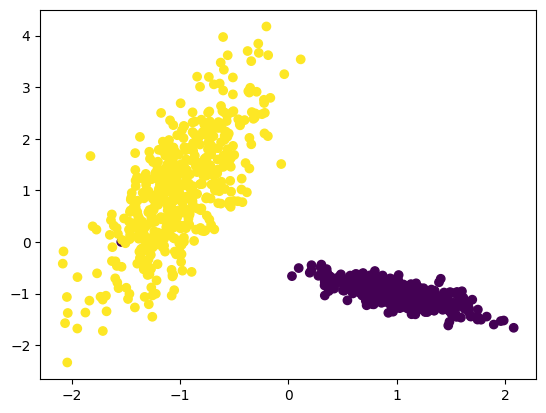

In [9]:


plt.scatter(points[:, 0], points[:, 1], c = labels)

In [10]:
print(points.shape, labels.shape)

(1000, 2) (1000,)


In [11]:
for i in range(len(labels)):
    print(points[i], labels[i])

[ 0.55675712 -0.90890878] 0
[ 0.03286753 -0.66195807] 0
[-0.81578351  1.1191489 ] 1
[ 1.34926148 -1.07213922] 0
[-1.4056945   0.27443886] 1
[-0.78441141  1.36588278] 1
[ 1.10833465 -1.05608124] 0
[-1.10493055  1.70399728] 1
[-1.14469992  0.93975619] 1
[ 0.40790053 -0.83335064] 0
[-1.20889936  0.72819164] 1
[ 0.83961101 -0.81039275] 0
[-0.35998762  1.42430846] 1
[-1.33500373 -0.53000118] 1
[-0.7249529   2.33745679] 1
[-1.54248326e+00  8.70786899e-04] 0
[-0.97554763  0.75318803] 1
[ 1.31691902 -1.14314045] 0
[ 0.81004328 -1.08835624] 0
[-1.15804034  1.25866786] 1
[ 0.38559461 -0.69639198] 0
[ 1.39027651 -1.2329603 ] 0
[ 0.42446303 -0.74078944] 0
[-0.59129683  2.51313813] 1
[-0.83257735  1.5354045 ] 1
[ 0.61128445 -0.7631697 ] 0
[ 1.13501838 -0.9434242 ] 0
[ 1.21975407 -1.24449443] 0
[ 0.4968647  -0.76026654] 0
[ 1.11381851 -1.19869634] 0
[ 1.60142713 -0.95484352] 0
[-0.55058843  1.689528  ] 1
[ 0.46215415 -0.79321141] 0
[ 1.7483158  -1.31065506] 0
[-1.59799771 -0.70498067] 1
[-1.20655366

In [28]:
class SVM:
    def __init__(self, c=0.1):
        self.c = c
        self.W = 0
        self.b = 0

    def hinge_loss(self, W, b, X, Y):

        h_loss = 0.5*(np.dot(W, W.T))

        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(W, X[i].T) + b)

            h_loss += self.c*max(0, (1 - ti))
#         print(h_loss[0])
        return h_loss

    def stocastic_gradient_descent(self, X, Y, learn_rate = 0.003, epochs = 1000, batch = 20):

        m, n = X.shape
        W = np.zeros((1, n))
        b = 0
        loss_epoch = []

        for i in range(epochs):
          h_loss = self.hinge_loss(W, b, X, Y)
          loss_epoch.append(h_loss[0][0])

          for start in range(int(X.shape[0]/batch)):
            grad_w = 0
            grad_b = 0
#                 print(start)
            for j in range(start*batch, start*batch + batch):
              ti = Y[j]*(np.dot(W, X[j].T) + b)

              if ti>=1:
                 grad_w += 0
                 grad_b += 0

              else:
                grad_w += self.c*Y[j]*X[j]
                grad_b += self.c*Y[j]

            W = W - learn_rate*W + learn_rate*grad_w
            b = b + learn_rate*grad_b
        self.W = W
        self.b = b
        return W, b, loss_epoch

In [29]:
svm = SVM()
weights, bias, cost = svm.stocastic_gradient_descent(points, labels)

In [30]:
cost

[99.9999999999986,
 78.482693981778,
 61.228101568804156,
 54.94142444227611,
 52.774460752170704,
 51.806290999182934,
 51.23690234349013,
 50.963923601472004,
 50.810876448042556,
 50.6850875866467,
 50.59589731718141,
 50.522787197034994,
 50.451526880616115,
 50.3897970978809,
 50.3435112255297,
 50.29980300754838,
 50.266191371580746,
 50.23509446817165,
 50.20629203307685,
 50.187325053231646,
 50.169495891028674,
 50.153829483958916,
 50.140331930478254,
 50.132431872275546,
 50.12623263972263,
 50.12174426814303,
 50.11763754426399,
 50.11348114504509,
 50.11235729834399,
 50.110156319560716,
 50.10788573688833,
 50.10627271533167,
 50.104687376069094,
 50.10380340653778,
 50.10298793981402,
 50.10235236966484,
 50.10191019338388,
 50.10153784770881,
 50.10131344112087,
 50.10116707195175,
 50.10072368020599,
 50.100432910597945,
 50.100428588816165,
 50.100258859757055,
 50.10029949979634,
 50.10016082674154,
 50.10021822526618,
 50.10014527932379,
 50.100076795615514,
 50.100

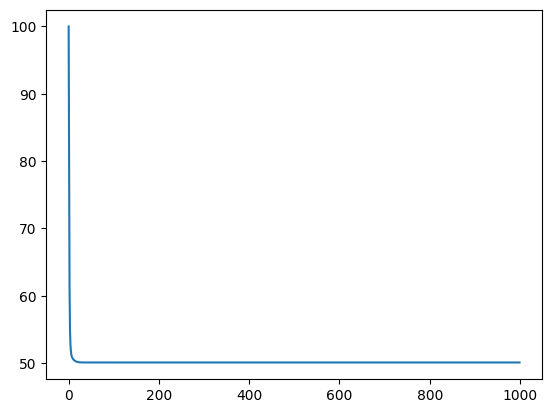

In [31]:
plt.plot(cost)

In [32]:
print(svm.hinge_loss(weights, bias, points, labels))

[[50.1]]


In [33]:
weights, bias

(array([[-9.28563824e-64,  1.16604632e-63]]), 1.0007999999999868)

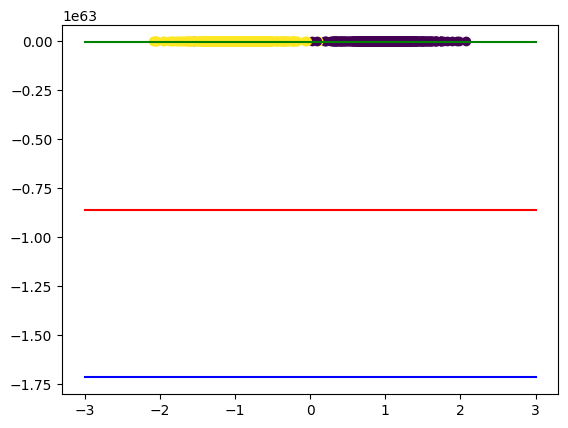

In [34]:
line = np.linspace(-3, 3, 10)
hyperplane = (-weights[0][0]*line - bias)/weights[0][1]

supp_line_pos = (-weights[0][0]*line - bias + 1)/weights[0][1]
supp_line_neg = (-weights[0][0]*line - bias - 1)/weights[0][1]

plt.plot(line, hyperplane, c = 'red')
plt.plot(line, supp_line_pos, c = 'green')
plt.plot(line, supp_line_neg, c = 'blue')
plt.scatter(points[:, 0], points[:, 1], c = labels)

In [35]:

weights[0][0]

-9.285638238052739e-64